ZUM_NLP: PROJECT GUIDELINES <br>
The aim of the project is to create a model of sentiment analysis based on tweets about current events in the world. <br>
The full project consists of 4 stages, but depending on the expected final grade, it is enough to follow the stages indicated below: <br>
3 ‚Äì stages 1B, 2 and 3 <br>
4 ‚Äì stages 1B, 2-4 <br>
5 ‚Äì stages 1A, 2-4 <br>
STAGE 1: DATA COLLECTION <br>

1A ‚Äì data in Polish/English/Spanish/Swedish or Portuguese (so that I can understand it)
Data acquisition concerns the collection of tweets. Each person scraps tweets (about 20k) to create a dataset for further processing. Tweets should be about current events, such as the war, NATO etc.
1.	Adding class labels: Collected data is not tagged as positive/negative/neutral.<br>
a.	Select the number of target classes (2 or 3 if we include neutral).<br>
b.	Clean data and remove stopwords<br>
c.	Create word embeddings for vectorized representation of words simillar in meaning // OR we use pretrained model for language of choice <br>
d.	Use K-MEANS to create clusters and use k=2 or k=3 depending on the numer of target classes <br>
e.	Based on clusters tag data and manually fix clusters if necessary <br>
It is a good idea to limit the number of words as much as possible and possibly manually tag some of them too.<br>
2.	Data cleaning: normalisation, special characters removal, punctuation, URL, emails, duplicates, lowercase text and choose type of tokenizer. NOTICE: this stage is necessary BEFORE the creation of word embeddings.<br>
1B ‚Äì ready data<br>
Use ready dataset (from Kaggle etc.)<br>
ETAP 2: CLASSIC ML<br>
Choose 3 models to fit data and present the results with confusion matric and roc curve. Just as in class. <br>
ETAP 3: NEURAL MODEL<br>
Choose type of neural network to train, and through validation decide on the best set of parameters. It is not enough to just build a model and get results. Fine-tuning is necessary too. <br>
In a loop we save the best model according to cost of validation. <br>
ETAP 4: LANGUAGE MODEL <br>
The last stage is to use selected language model, e.g. BERT, to create a sentiment analysis classifier. <br>

DEADLINE: check assigments in Teams <br>
SUBMISSION: GitHub repository ‚Äì if its private, make sure to share with dwnuk@pjwstk.edu.pl. Then add url to repo in Teams assigment.
NOTICE! If you aim for 4 or 5, the project can be done in groups of up to 3 ppl, but with the requirement of using more advanced models (e.g., usage of two neural networks for comparison) and more than 1 language model. <br>
BEFORE SUBMISSION MAKE SURE THAT THE REPOSITORY CONTAINS: <br>
- scripts/python files .py, <br>
- README.md file with z project description and instructions how to use it, <br>
- saved models (as long as possible due to storage limits) <br>
- data used in the project in csv format or compressed <br>
- you can briefly describe achieved results in README file along with project overview, without going into too much detail.<br>

<br><br><br>



In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# !pip install tweepy --upgrade
# !pip install matplotlib
# !pip install pandas
# !pip install wordcloud
!pip install clean-text
!pip install spacy --upgrade
!python -m spacy download pl_core_news_lg
!python -m spacy download en_core_web_md
!pip install transformers==4.26.1
!pip install -U datasets
!pip install plot_keras_history -q
!pip install unidecode -q
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 175.4/175.4 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=474a0b7bb783d1b4c0b133d16ee408602f050b1261f6fb97dbd15c846d3f4771
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.6/6.6 MB 44.6 MB/s eta 0:00:00
  At

In [ ]:
from cleantext import clean
from datasets import Dataset, load_metric

from datetime import datetime, timedelta
from gensim.models import Word2Vec
from keras.models import Sequential
from gensim.models.phrases import Phrases, Phraser
from keras import backend as K
from keras import layers, regularizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from IPython.display import display
from plot_keras_history import show_history, plot_history
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from tensorflow.keras.optimizers import RMSprop, Adam
from time import time
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BertModel, BertTokenizerFast, pipeline, TrainingArguments, Trainer, RobertaForSequenceClassification
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS
import emoji
import keras
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import re
import spacy
import tensorflow as tf
import tensorflow_datasets as tfds
import torch
import transformers
import tweepy



tqdm.pandas()

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
# wandb.init(project="", entity="")

# schowane

Pobieranie tweet√≥w:<br>
  1) W jƒôzyku angielskim --> ok 200 ty≈õ.<br>
  2) W jƒôzyku polskim --> ok 200 ty≈õ.<br>

In [ ]:
def create_word_cloud(lista):
  comment_words = ''
  stopwords = set(STOPWORDS)
  
  for item in lista:
      
      tokens = item["cleaned_tweet"].split()
      tokens = [token.lower() for token in tokens]
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

def get_old_data(last_days_num):
       now = datetime.now()
       then = now - timedelta(days=last_days_num)
       month = str(then.month).zfill(2)
       day = str(then.day).zfill(2)
       start_date = f"{then.year}-{month}-{day}T00:00:00Z"
       return start_date

class UserStats(object):
    def __init__(self, user):
        self.client = client
        self.username = user
        user = self.client.get_user(username=user, user_fields=["created_at", "public_metrics", "verified"])
        self.id = user.data.id
        self.created = user.data.created_at
        self.followers_number = user.data.public_metrics["followers_count"]
        self.followed_number = user.data.public_metrics["following_count"]
        self.tweet_number = user.data.public_metrics["tweet_count"]
        self.if_verified = user.data.verified

    def get_tweets(self, previous_days=30):
        self.previous_days = previous_days
        old_data = get_old_data(previous_days)
        query = f"from:{self.username}"
        self.last_tweets = self.client.search_all_tweets(query, start_time=old_data, max_results=300, tweet_fields=["public_metrics"])
        self.processed_tweets = [clean_tweet(tweet.text) for tweet in self.last_tweets.data]

    def calculate_popularity(self):
        self.popularity_score = sum([tt.public_metrics["retweet_count"] for tt in self.last_tweets.data]) + \
                                sum([tt.public_metrics["like_count"] for tt in self.last_tweets.data])
        self.reach_score = self.followers_number - self.followed_number

    def get_followers(self, max_results=100):
        followers = self.client.get_users_followers(self.id, max_results=max_results)
        return [follower.username for follower in followers.data]

    def print_basic_stats(self):
        print(f"Popularity score: {self.popularity_score}")
        print(f"Reach score: {self.reach_score}")



# Pobieranie tweet√≥w

In [ ]:
academic_bearer = "AAAAAAAAAAAAAAAAAAAAADIEawEAAAAAxzzD4cQ2g8FGK2%2BkKz2%2FJvTnoMA%3D09uegYs5HrQvrsFkAEl3WwxhspBYFBIH3Vnykec79asqiUsSoA"
import tweepy
client = tweepy.Client(academic_bearer)
api = tweepy.API(academic_bearer)

In [ ]:
#Pobieranie tweet√≥w po keyword
def get_tweets_keyword(language, keyword):
  tweets = []
  query =  'lang:' + language + ' ' + keyword
  tweet_fields = ['created_at']
  max_result = 500
  number_of_wanted_tweets = 60000
  iterations = (number_of_wanted_tweets / max_result)

  response = client.search_all_tweets(query=query, max_results=max_result, media_fields=None)
  next_token = response.meta['next_token']
  for i in range(int(iterations)):
    time.sleep(1)
    response = client.search_all_tweets(query=query, max_results=max_result, media_fields=None, next_token = next_token)
    tweets.extend(response.data)
    if(response.meta.get('next_token') == None):
      return tweets
    next_token = response.meta['next_token']

      
  return tweets

tweets_en = get_tweets_keyword('en', 'eurovision')

tweets_pl = get_tweets_keyword('pl', 'pis')


Zapisanie danych do csv

In [ ]:
pd.DataFrame(tweets_en).to_csv('eurovision.csv', index=False)
pd.DataFrame(tweets_pl).to_csv('pis_raw.csv', index=False)

#Funkcje pomocnicze


In [ ]:
def create_tfidf_dictionary(x, transformed_file, features):
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.title.split()))



In [ ]:
def replace_sentiment_words(word, sentiment_dict):

    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [ ]:
def predict(model, texts_to_test, tokenizer, sequence_length=200):

    sequences = tokenizer.texts_to_sequences(texts_to_test)
    padded = pad_sequences(sequences, maxlen=200, dtype='int32', value=0)
    prediction = model.predict(padded,batch_size=1,verbose = 2)[0]

    print(prediction)

    pred_labels = []
    
    if np.argmax(prediction) == 2:
        pred_labels.append(1)
    elif np.argmax(prediction) == 1:
        pred_labels.append(0) 
    else:
        pred_labels.append(-1)

    for i in range(1):
        print(texts_to_test)
        if pred_labels[i] == 1:
            s = 'Positive'
        elif(pred_labels[i] == 0):
            s = 'Neutral'
        else:
            s = 'Negative'
        print("Predicted sentiment : ",s)

# Dobre 

Wczytanie danych z csv i wstƒôpne czysczenie

In [ ]:

RETWEETED_REGEX = r"^RT @([^ ]+):"
USER_REGEX = r"@([^ ]+)"
URL_REGEX = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
CHARACTER_REGEX = r"[^a-zA-Z\s']"

def clean_tweet(tweets):
    cleaned_tweets = []
    for t in tweets:
      t = re.sub(RETWEETED_REGEX, "", t)
      t = re.sub(USER_REGEX, "", t)
      t = re.sub(URL_REGEX, "", t)
      # t = re.sub(CHARACTER_REGEX, "", t)
      tw = emoji.replace_emoji(t, replace='')
      cleaned_tweets.append(tw.strip().replace('\n', ' '))
      
    return cleaned_tweets

tweets_en_clean = clean_tweet(pd.read_csv('eurovision.csv', encoding="utf-8")['text'])
tweets_pl_clean =  clean_tweet(pd.read_csv('pis_raw.csv', encoding="utf-8")['text'])

FileNotFoundError: ignored

Zapisanie danych do df

In [ ]:
tweets_en_df = pd.DataFrame(tweets_en_clean, columns=['text'])
tweets_pl_df = pd.DataFrame(tweets_pl_clean, columns=['text'])

# Usuniƒôcie duplikat√≥w

In [ ]:
tweets_en_df.drop_duplicates(inplace=True)
tweets_pl_df.drop_duplicates(inplace=True)

# Modele

Wczytanie modeli

In [ ]:
nlp_en = spacy.load("en_core_web_md", disable=['ner', 'parser'])
nlp_en.add_pipe('sentencizer')

nlp_pl = spacy.load("pl_core_news_lg", disable=['ner', 'parser'])
nlp_pl.add_pipe('sentencizer')

Usuniƒôcie stop word√≥w

In [ ]:
def remove_stopwords_en(text):
  return ' '.join(filter(lambda x: x not in nlp_en.Defaults.stop_words, text.split()))

def remove_stopwords_pl(text):
  return ' '.join(filter(lambda x: x not in nlp_pl.Defaults.stop_words, text.split()))

tweets_en_df['text'] = tweets_en_df['text'].apply(remove_stopwords_en)
tweets_pl_df['text'] = tweets_pl_df['text'].apply(remove_stopwords_pl)

Lematyzacja

In [ ]:
def lemmatize_en(text):
  return ' '.join([x.lemma_ for x in nlp_en(text)])

def lemmatize_pl(text):
  return ' '.join([x.lemma_ for x in nlp_pl(text)])

tweets_en_df['text_lemmatized'] = tweets_en_df['text'].progress_apply(lemmatize_en)
tweets_pl_df['text_lemmatized'] = tweets_pl_df['text'].progress_apply(lemmatize_pl)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19560/19560 [02:56<00:00, 110.93it/s]


In [ ]:
tweets_pl_df

text  \
0      Od czasu wpuszczenia ukrai≈Ñskiego zbo≈ºa polski...   
1      Za nikt tyle odbierze ukradnie PIS.. wolƒô mieƒá...   
2      Minister Podpisa≈Ça dokument przyspieszyƒá trans...   
3      Pozytywny przekaz majstrowania komisarzach. Pi...   
5      Platforma media atakujƒÖ k≈Çamstwami manipulacja...   
...                                                  ...   
59968  M√≥w siebie. Za d≈Çugo obserwuje scenƒô polityczn...   
59969  Dla kogo eldorado, emeryt√≥w rzƒÖdzƒÖcych, dziƒôki...   
59972  Przesta≈Ñ dziewczƒô be≈Çkotaƒá! Bzdury gaworzysz !...   
59974             Czyli woli Pan PiS likwidacjƒô pa≈Ñstwa?   
59981  Hahaa. ≈öwirek? Ten jachtu kilkana≈õcie milion√≥w...   

                                         text_lemmatized  
0      od czas wpuszczeƒá ukrai≈Ñski zbo≈ºe polski rynek...  
1      za nikt tyle odebraƒá ukradnie PIS . . woleƒá mi...  
2      minister podpisaƒá dokument przyspieszyƒá transf...  
3      pozytywny przekaz majstrowaƒá komisarza . PiS w...  
5      platforma media atakowaƒá k≈Çamstwo manipulacj d...  
...                                                  ...  
59968  m√≥w siebie . za d≈Çugo obserwowaƒá scena polityc...  
59969  dla kto eldorado , emeryt rzƒÖdzƒÖcy , dziƒôki pr...  
59972  Przesta≈Ñ dziewczƒô be≈Çkotaƒá ! Bzdura gaworzyƒá !...  
59974           czyli woleƒá pan PiS likwidacja pa≈Ñstwo ?  
59981  Haha . ≈öwirek ? ten jacht kilkana≈õcie milion m...  

[19560 rows x 2 columns]

Chmury s≈Ç√≥w

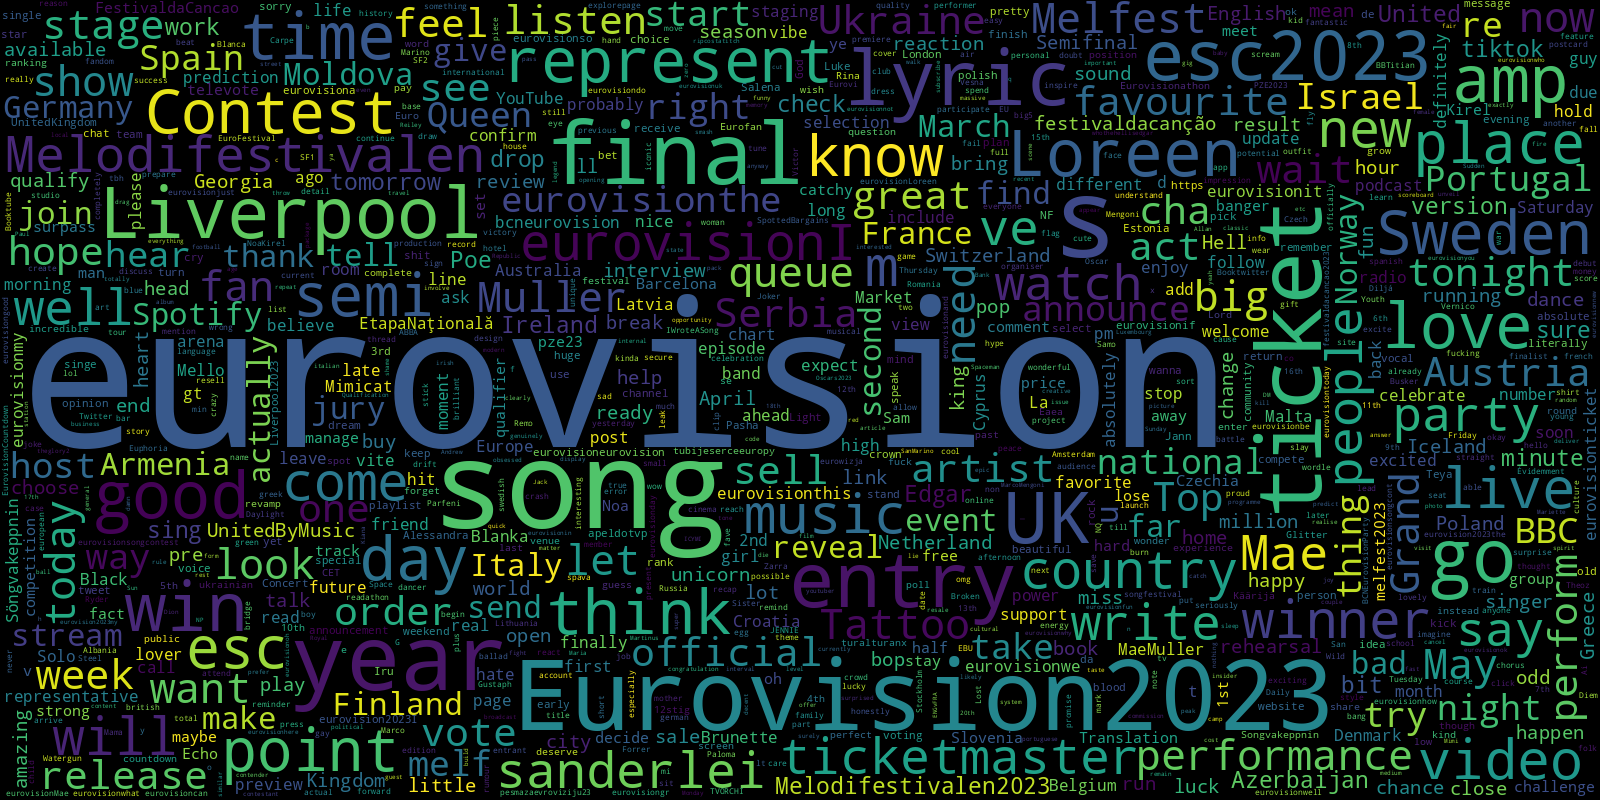

In [ ]:
text = ''.join(tweets_en_df['text_lemmatized'])
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text)
wc.to_image()

Klasyfikacja

In [ ]:
# Define pipeline
classifier_en = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis") 
classifier_pl = pipeline(model="bardsai/twitter-sentiment-pl-base") 

In [ ]:
tweets_en = []
for tweet in tweets_en_df['text_lemmatized'].to_list():
   try:
     sentiment = classifier_en(tweet)
     tweets_en.append({'tweet': tweet, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

In [ ]:
tweets_pl = []
# for tweet in tmp['text']:
for tweet in tweets_pl_df['text_lemmatized'].to_list():
   try:
     sentiment = classifier_pl(tweet)
     tweets_pl.append({'tweet': tweet, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

In [ ]:
tweets_en

In [ ]:
pd.DataFrame(tweets_en).to_csv('tweets_with_labels_en.csv', index=False)

In [ ]:
pd.DataFrame(tweets_pl).to_csv('tweets_with_labels_pl.csv', index=False)

#Wczytanie i obr√≥bka przygotowanych danych z pliku CSV

In [ ]:
tweets_en = pd.read_csv('tweets_with_labels_en.csv')
tweets_pl = pd.read_csv('tweets_with_labels_pl.csv')

Otagowanie datafram√≥w

In [ ]:
conditions_en = [
    (tweets_en['sentiment'] == 'POS'),
    (tweets_en['sentiment'] == 'NEU'),
    (tweets_en['sentiment'] == 'NEG')
]
values = [1,0,-1]

tweets_en['target'] = np.select(conditions_en, values) 

conditions_pl = [
    (tweets_pl['sentiment'] == 'positive'),
    (tweets_pl['sentiment'] == 'neutral'),
    (tweets_pl['sentiment'] == 'negative')
]

tweets_pl['target'] = np.select(conditions_pl, values) 

In [ ]:
data_pl = tweets_pl.dropna().drop_duplicates().reset_index(drop=True)
data_en = tweets_en.dropna().drop_duplicates().reset_index(drop=True)

In [ ]:
def clean_data(text):

  text = unidecode(text)
  text = str(text)
  text = text.lower()

  text = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
  text = re.sub(r"\+", " plus ", text)
  text = re.sub(r",", " ", text)
  text = re.sub(r"\.", " ", text)
  text = re.sub(r"!", " ! ", text)
  text = re.sub(r"\?", " ? ", text)
  text = re.sub(r"'", " ", text)
  text = re.sub(r":", " : ", text)
  text = re.sub(r"\s{2,}", " ", text)

  return text

In [ ]:
data_pl.tweet = data_pl.tweet.apply(lambda x: clean_data(x))
data_en.tweet = data_en.tweet.apply(lambda x: clean_data(x))

#KMeans - Jƒôzyk Polski

In [ ]:
file_cleaned_pl = data_pl.rename(columns={'tweet':'title', 'target':'rate'})

In [ ]:
file_cleaned_pl.rate.value_counts()/len(file_cleaned_pl)
file_cleaned_pl[file_cleaned_pl.rate==0]
file_cleaned_pl = file_cleaned_pl[file_cleaned_pl.rate!=0]
file_cleaned_pl.rate.value_counts()/len(file_cleaned_pl)


-1    0.897321
 1    0.102679
Name: rate, dtype: float64

In [ ]:
def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = clean_data(text)
    text = text.split()

    return text  


In [ ]:
file_cleaned_pl.title = file_cleaned_pl.title.apply(lambda x: text_to_word_list(x))
file_model_pl = file_cleaned_pl.copy()
file_model_pl = file_model_pl[file_model_pl.title.str.len()>1]


In [ ]:
sent = [row for row in file_model_pl.title]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences_pl = bigram[sent]
sentences_pl[1]

['na',
 'czekac',
 'i',
 '100',
 'i',
 'wielki',
 'nadzieja',
 'wy',
 'rowniez',
 'wyjdzmy',
 'pokazmy',
 'sprzeciw',
 '!_!',
 '!',
 'w_czerwiec',
 'wielki_marsz']

In [ ]:
w2v_model_pl = Word2Vec(min_count=3,
                     window=4,
                     vector_size=300,
                     sample=1e-4, 
                     alpha=0.15, 
                     min_alpha=0.006, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

w2v_model_pl.build_vocab(sentences_pl, progress_per=50000)

# w2v_model_pl = Word2Vec(min_count=3,
#                      window=4,
#                      vector_size=300,
#                      sample=1e-5, 
#                      alpha=0.14, 
#                      min_alpha=0.007, 
#                      negative=20,
#                      workers=multiprocessing.cpu_count()-1)

# w2v_model_pl.build_vocab(sentences_pl, progress_per=50000)

In [ ]:
w2v_model_pl.train(sentences_pl,
                total_examples=w2v_model_pl.corpus_count,
                epochs=30,
                report_delay=1)

w2v_model_pl.init_sims(replace=True)

<ipython-input-18-82867c9eb7cc>:6: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_pl.init_sims(replace=True)


In [ ]:
w2v_model_pl.save("word2vec_pl.model")

In [ ]:
file_export_pl = file_model_pl.copy()
file_export_pl['old_title'] = file_export_pl.title
file_export_pl.old_title = file_export_pl.old_title.str.join(' ')
file_export_pl.title = file_export_pl.title.apply(lambda x: ' '.join(bigram[x]))
file_export_pl.rate = file_export_pl.rate.astype('int8')

In [ ]:
file_export_pl[['title', 'rate']].to_csv('cleaned_dataset_pl.csv', index=False)

In [ ]:
word_vectors_pl = Word2Vec.load("word2vec_pl.model").wv

model_pl = KMeans(n_clusters=2,
               max_iter=1000,
               random_state=True,
               n_init=50)
model_pl.fit(X=word_vectors_pl.vectors.astype('double'))

KMeans(max_iter=1000, n_clusters=2, n_init=50, random_state=True)

In [ ]:
word_vectors_pl.similar_by_vector(model_pl.cluster_centers_[1], topn=10, restrict_vocab=None)

[('pretensja_demokratyczny', 0.9844341278076172),
 ('emerytom_dobrze', 0.9790809750556946),
 ('zdolny_kazdy', 0.9727032780647278),
 ('totalna_porazka', 0.9711011052131653),
 ('stadnina_kon', 0.9671549797058105),
 ('taaaa', 0.964419960975647),
 ('zdjecie_jpii', 0.9640563726425171),
 ('posmiewisek', 0.9582293033599854),
 ('nie_draznic', 0.9559149742126465),
 ('swiatopogladowo', 0.9554888010025024)]

In [ ]:
positive_cluster_index = 1
positive_cluster_center_pl = model_pl.cluster_centers_[positive_cluster_index]
negative_cluster_center_pl = model_pl.cluster_centers_[1-positive_cluster_index]

In [ ]:
words_pl = pd.DataFrame(word_vectors_pl.index_to_key)
words_pl.columns = ['words']
words_pl['vectors'] = words_pl.words.apply(lambda x: word_vectors_pl[f'{x}'])
words_pl['cluster'] = words_pl.vectors.apply(lambda x: model_pl.predict([np.array(x)]))
words_pl.cluster = words_pl.cluster.apply(lambda x: x[0])
words_pl['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words_pl.cluster]
words_pl['closeness_score'] = words_pl.apply(lambda x: 1/(model_pl.transform([x.vectors]).min()), axis=1)
words_pl['sentiment_coeff'] = words_pl.closeness_score * words_pl.cluster_value

In [ ]:
words_pl[words_pl.cluster != 1].sample(10)

words                                            vectors  \
5523  symbol_wiarygodnosc  [0.049142446, 0.003311821, 0.14977337, -0.0047...   
4171             10_zloty  [-0.038700547, -0.026931446, 0.19706433, 0.095...   
2350               kolano  [0.024854949, 0.02925651, 0.13509017, 0.082246...   
6611         okrasc_polak  [-0.008891415, 0.012760632, 0.21102425, 0.0610...   
4240             pogodzic  [0.055127956, 0.060874447, 0.07073823, 0.02950...   
7018                kurde  [-0.029738313, -0.007393459, 0.1166453, 0.0552...   
4489                odsuc  [0.120333105, -0.00849076, 0.14188728, 0.06812...   
2127             nastapic  [0.060201723, -0.02969903, 0.17157413, 0.07898...   
2831           przeprosic  [-0.027223447, 0.03506893, 0.08968382, -0.0110...   
5625      siegac_opozycja  [0.02190494, 0.030864256, 0.03227992, -0.06601...   

      cluster  cluster_value  closeness_score  sentiment_coeff  
5523        0             -1         1.251787        -1.251787  
4171        0             -1         1.365176        -1.365176  
2350        0             -1         1.605629        -1.605629  
6611        0             -1         1.800091        -1.800091  
4240        0             -1         1.600153        -1.600153  
7018        0             -1         1.640191        -1.640191  
4489        0             -1         1.783054        -1.783054  
2127        0             -1         1.634349        -1.634349  
2831        0             -1         1.380790        -1.380790  
5625        0             -1         1.198334        -1.198334

In [ ]:
words_pl[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary_pl.csv', index=False)

In [ ]:
final_file_pl = pd.read_csv('cleaned_dataset_pl.csv')
sentiment_map_pl = pd.read_csv('sentiment_dictionary_pl.csv')
sentiment_dict_pl = dict(zip(sentiment_map_pl.words.values, sentiment_map_pl.sentiment_coeff.values))

In [ ]:
file_weighting_pl = final_file_pl.copy()
tfidf_pl = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf_pl.fit(file_weighting_pl.title)
features_pl = pd.Series(tfidf_pl.get_feature_names_out())
transformed_pl = tfidf_pl.transform(file_weighting_pl.title)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
replaced_tfidf_scores_pl = file_weighting_pl.apply(lambda x: replace_tfidf_words(x, transformed_pl, features_pl), axis=1)

In [ ]:
replaced_closeness_scores_pl = file_weighting_pl.title.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict_pl), x.split())))

In [ ]:
replacement_df_pl = pd.DataFrame(data=[replaced_closeness_scores_pl, replaced_tfidf_scores_pl, file_weighting_pl.title, file_weighting_pl.rate]).T
replacement_df_pl.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df_pl['sentiment_rate'] = replacement_df_pl.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df_pl['prediction'] = (replacement_df_pl.sentiment_rate>0).astype('int8')
replacement_df_pl['sentiment'] = [1 if i==1 else 0 for i in replacement_df_pl.sentiment]

In [ ]:
replacement_df_pl[replacement_df_pl['prediction'] == 0].sample(10)

sentiment_coeff  \
5653   [-1.281597349851216, 0, -1.341478284887109, -1...   
11149  [-1.190761416525378, -1.5531687786636117, 1.40...   
88     [1.302263793229227, 1.4926201319485846, -1.391...   
5472   [-1.3021042847710074, 1.3486629614678698, -1.2...   
11320  [-1.2613279327825235, 0, 1.6354986972715622, 0...   
4532   [-1.4873652076062354, 1.3915074301266137, 0, -...   
576    [0, -1.190761416525378, -1.7412977875225404, -...   
9280   [-1.7322532087331568, 0, 0, -1.598329389595168...   
1422   [1.3716700487397933, 0, -1.556501943570607, -1...   
4840   [-1.2084817406064248, -1.257356146528765, -1.5...   

                                            tfidf_scores  \
5653   [3.703007568253312, 9.331827004436057, 7.86548...   
11149  [1.0674636747043904, 6.669239177410605, 5.3552...   
88     [3.1657091151743, 5.495965359973476, 12.121982...   
5472   [3.593106478418576, 5.312445480687412, 9.04414...   
11320  [3.979968870959991, 9.331827004436057, 7.33939...   
4532   [5.112319299259951, 4.229930119061477, 9.73729...   
576    [9.737292112544221, 1.0674636747043904, 8.3509...   
9280   [9.044144931984277, 9.737292112544221, 9.73729...   
1422   [4.456629681234906, 9.331827004436057, 7.79138...   
4840   [5.248655742812082, 9.667738265015076, 5.91957...   

                                                sentence  sentiment  \
5653                        polska spelniec standard pis          1   
11149        pis bron pisowski patola klamstwa szczujnia          0   
88     to dzieki rolnik pis wiekszosc rolnik glosowac...          0   
5472   nie musiec biorac_uwaga napiecie wewnatrz konf...          0   
11320  i niestety_racja poprzez wyprowadzec znaczny k...          0   
4532   z ten obnizka_podatek pis zgodzic nie liczyc s...          0   
576          funkcjonariuszka pis beznadziejny kazdy_cal          0   
9280   towarzyszka spesc pisobolszewik klakier powied...          0   
1422         jak zygac nas pis ? kasiorka worek idiota ?          0   
4840   inflacja ! drozyzna ! bieda ! a pisowiec rozda...          0   

       sentiment_rate  prediction  
5653       -16.568243           0  
11149      -32.745753           0  
88         -23.716239           0  
5472       -10.367581           0  
11320       -3.267481           0  
4532      -106.720257           0  
576        -28.899022           0  
9280       -45.037006           0  
1422       -57.705246           0  
4840       -73.648323           0

In [ ]:
replacement_df_pl.groupby(['prediction']).count()

sentiment_coeff  tfidf_scores  sentence  sentiment  sentiment_rate
prediction                                                                    
0                      3456          3456      3456       3456            3456
1                      9005          9005      9005       9005            9005

In [ ]:
predicted_classes_pl = replacement_df_pl.prediction
y_test_pl = replacement_df_pl.sentiment

conf_matrix_pl = pd.DataFrame(confusion_matrix(replacement_df_pl.sentiment, replacement_df_pl.prediction))
print('Confusion Matrix')
display(conf_matrix_pl)

test_scores_pl = accuracy_score(y_test_pl,predicted_classes_pl), precision_score(y_test_pl, predicted_classes_pl), recall_score(y_test_pl, predicted_classes_pl), f1_score(y_test_pl, predicted_classes_pl)

print('\n \n Scores')
scores_pl = pd.DataFrame(data=[test_scores_pl])
scores_pl.columns = ['accuracy', 'precision', 'recall', 'f1']
scores_pl = scores_pl.T
scores_pl.columns = ['scores']
display(scores_pl)

Confusion Matrix


0     1
0  3034  8150
1   422   855


 
 Scores


scores
accuracy   0.312094
precision  0.094947
recall     0.669538
f1         0.166310

#KMeans - Jƒôzyk Angielski

In [ ]:
file_cleaned_en = data_en.rename(columns={'tweet':'title', 'target':'rate'})

In [ ]:
file_cleaned_en.rate.value_counts()/len(file_cleaned_en)
file_cleaned_en[file_cleaned_en.rate==0]
file_cleaned_en = file_cleaned_en[file_cleaned_en.rate!=0]
file_cleaned_en.rate.value_counts()/len(file_cleaned_en)

 1    0.744237
-1    0.255763
Name: rate, dtype: float64

In [ ]:
file_cleaned_en.title = file_cleaned_en.title.apply(lambda x: text_to_word_list(x))
file_model_en = file_cleaned_en.copy()
file_model_en = file_model_en[file_model_en.title.str.len()>1]

In [ ]:
sent = [row for row in file_model_en.title]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences_en = bigram[sent]
sentences_en[1]

['junior',
 'eurovision',
 '2023',
 'hold_nice',
 'november_26',
 '!',
 'junioreurovusion_jesc',
 'jesc2023',
 'eurovision',
 'eurovisio']

In [ ]:
w2v_model_en = Word2Vec(min_count=3,
                     window=4,
                     vector_size=300,
                     sample=1e-4, 
                     alpha=0.12, 
                     min_alpha=0.007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

w2v_model_en.build_vocab(sentences_en, progress_per=50000)

In [ ]:
w2v_model_en.train(sentences_en,
                total_examples=w2v_model_en.corpus_count,
                epochs=25,
                report_delay=1)

w2v_model_en.init_sims(replace=True)

<ipython-input-459-ef18114cefca>:6: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_en.init_sims(replace=True)


In [ ]:
w2v_model_en.save("word2vec_en.model")

In [ ]:
file_export_en = file_model_en.copy()
file_export_en['old_title'] = file_export_en.title
file_export_en.old_title = file_export_en.old_title.str.join(' ')
file_export_en.title = file_export_en.title.apply(lambda x: ' '.join(bigram[x]))
file_export_en.rate = file_export_en.rate.astype('int8')

In [ ]:
file_export_en[['title', 'rate']].to_csv('cleaned_dataset_en.csv', index=False)

In [ ]:
word_vectors_en = Word2Vec.load("word2vec_en.model").wv

In [ ]:
model_en = KMeans(n_clusters=2,
               max_iter=1000,
               random_state=True,
               n_init=50)
model_en.fit(X=word_vectors_en.vectors.astype('double'))

KMeans(max_iter=1000, n_clusters=2, n_init=50, random_state=True)

In [ ]:
word_vectors_en.similar_by_vector(model_en.cluster_centers_[1], topn=10, restrict_vocab=None)

[('l_lm', 0.8394796252250671),
 ('a_royal', 0.6671769618988037),
 ('mummi_lu', 0.6069812774658203),
 ('nemot', 0.5736380219459534),
 ('kramer_/', 0.5563502907752991),
 ('unitedbymusic_myeurofreak', 0.5561437606811523),
 ('fun_after', 0.5446232557296753),
 ('leejaewook', 0.5340744853019714),
 ('france_lazarra', 0.5288264751434326),
 ('leejaewook_galapremierewgua', 0.518953800201416)]

In [ ]:
positive_cluster_index = 1
positive_cluster_center_en = model_en.cluster_centers_[positive_cluster_index]
negative_cluster_center_en = model_en.cluster_centers_[1-positive_cluster_index]

In [ ]:
words_en = pd.DataFrame(word_vectors_en.index_to_key)
words_en.columns = ['words']
words_en['vectors'] = words_en.words.apply(lambda x: word_vectors_en[f'{x}'])
words_en['cluster'] = words_en.vectors.apply(lambda x: model_en.predict([np.array(x)]))
words_en.cluster = words_en.cluster.apply(lambda x: x[0])
words_en['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words_en.cluster]
words_en['closeness_score'] = words_en.apply(lambda x: 1/(model_en.transform([x.vectors]).min()), axis=1)
words_en['sentiment_coeff'] = words_en.closeness_score * words_en.cluster_value

In [ ]:
words_en[words_en.cluster != 1].sample(10)

words                                            vectors  \
1622     podcast_app  [-0.016586509, 0.0404935, 0.023777502, 0.04292...   
591     million_view  [0.03770035, -0.12916237, 0.0047037858, -0.059...   
650             sale  [-0.040351745, -0.08238686, -0.030970206, -0.0...   
4469     family_show  [0.06792471, -0.015969709, -0.02621744, -0.006...   
2779           shirt  [-0.083372265, -0.0101030385, 0.031909652, 0.0...   
2326       want_miss  [-0.08528803, 0.025007857, 0.086480565, 0.0166...   
1910        superfan  [-0.008167628, 0.025059884, -0.039289735, -0.0...   
4422  roberts_weeema  [-0.037216973, -0.013406323, 0.06514294, 0.027...   
3478          excuse  [0.019254517, 0.0012873608, -0.050885078, 0.02...   
3919          dazzle  [-0.008243985, 0.019201495, -0.011805144, 0.00...   

      cluster  cluster_value  closeness_score  sentiment_coeff  
1622        0             -1         1.026814        -1.026814  
591         0             -1         1.067190        -1.067190  
650         0             -1         1.037432        -1.037432  
4469        0             -1         1.035988        -1.035988  
2779        0             -1         1.053488        -1.053488  
2326        0             -1         1.054040        -1.054040  
1910        0             -1         1.098751        -1.098751  
4422        0             -1         1.159443        -1.159443  
3478        0             -1         1.036253        -1.036253  
3919        0             -1         1.070845        -1.070845

In [ ]:
words_en[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary_en.csv', index=False)

In [ ]:
final_file_en = pd.read_csv('cleaned_dataset_en.csv')
sentiment_map_en = pd.read_csv('sentiment_dictionary_en.csv')
sentiment_dict_en = dict(zip(sentiment_map_en.words.values, sentiment_map_en.sentiment_coeff.values))

In [ ]:
file_weighting_en = final_file_en.copy()
tfidf_en = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf_en.fit(file_weighting_en.title)
features_en = pd.Series(tfidf_en.get_feature_names_out())
transformed_en = tfidf_en.transform(file_weighting_en.title)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
replaced_tfidf_scores_en = file_weighting_en.apply(lambda x: replace_tfidf_words(x, transformed_en, features_en), axis=1)

In [ ]:
replaced_closeness_scores_en = file_weighting_en.title.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict_en), x.split())))

In [ ]:
replacement_df_en = pd.DataFrame(data=[replaced_closeness_scores_en, replaced_tfidf_scores_en, file_weighting_en.title, file_weighting_en.rate]).T
replacement_df_en.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df_en['sentiment_rate'] = replacement_df_en.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df_en['prediction'] = (replacement_df_en.sentiment_rate>0).astype('int8')
replacement_df_en['sentiment'] = [1 if i==1 else 0 for i in replacement_df_en.sentiment]

In [ ]:
replacement_df_en[replacement_df_en['prediction'] == 0].sample(10)

sentiment_coeff  \
1227   [-1.1348723882529017, -1.1735411829124218, -1....   
10130  [1.004222574843066, -1.0996732157131677, -1.04...   
5235   [0, -1.0176774251375529, -1.0245632876201547, ...   
9650   [-1.112030285405566, 0, 1.004320139729006, -0....   
2609   [1.004222574843066, 1.004320139729006, -0.9973...   
9148   [1.0188744134220151, 1.004320139729006, -1.001...   
7262   [0, 0, -1.1518339922620495, -1.114065620793644...   
9698   [-1.050864894622653, 1.004320139729006, -1.153...   
5210   [1.0111196476774256, 1.0104347107671257, 1.000...   
4268   [1.0000592032323703, -1.0940997842029485, 0.99...   

                                            tfidf_scores  \
1227   [7.992514120918473, 8.44449924466153, 8.444499...   
10130  [3.41780314241509, 8.44449924466153, 6.7268477...   
5235   [9.291797105048733, 16.88899848932306, 5.87954...   
9650   [8.310967852037008, 9.291797105048733, 1.05520...   
2609   [6.83560628483018, 1.0552000396947916, 5.09710...   
9148   [5.077203414675056, 2.110400079389583, 5.47775...   
7262   [9.291797105048733, 9.291797105048733, 7.90550...   
9698   [4.458164206268833, 1.0552000396947916, 9.0041...   
5210   [5.826061202249007, 2.07729269089759, 5.112294...   
4268   [5.203023587876089, 9.004115032596953, 6.80689...   

                                                sentence  sentiment  \
1227   royal_albert dock_ready welcome_float earth eu...          1   
10130  the tm website play some i hope ticket eurovis...          1   
5235   inspired particular news story particular jour...          1   
9650   ticketmaster_absolute piss_huge eurovision fan...          0   
2609   the eurovision song_contest come big_screen ! ...          1   
9148   amazing eurovision grand_final ticket_sell 36_...          1   
7262   5_discount code_bbvrxz shugatiti_valentine gif...          1   
9698   ticketmaster eurovision literally_watch ticket...          0   
5210   nice ! will check tomorrow_sundayfunday bbtiti...          1   
4268   one item update eurovision focus announcement ...          1   

       sentiment_rate  prediction  
1227       -18.827663           0  
10130      -22.890843           0  
5235       -14.696662           0  
9650       -99.505868           0  
2609        -3.214966           0  
9148       -24.240725           0  
7262       -73.030824           0  
9698       -18.903512           0  
5210        -9.176145           0  
4268        -4.943988           0

In [ ]:
replacement_df_en.groupby(['prediction']).count()

sentiment_coeff  tfidf_scores  sentence  sentiment  sentiment_rate
prediction                                                                    
0                      2162          2162      2162       2162            2162
1                      9810          9810      9810       9810            9810

In [ ]:
predicted_classes_en = replacement_df_en.prediction
y_test_en = replacement_df_en.sentiment

conf_matrix_en = pd.DataFrame(confusion_matrix(replacement_df_en.sentiment, replacement_df_en.prediction))
print('Confusion Matrix')
display(conf_matrix_en)

test_scores_en = accuracy_score(y_test_en,predicted_classes_en), precision_score(y_test_en, predicted_classes_en), recall_score(y_test_en, predicted_classes_en), f1_score(y_test_en, predicted_classes_en)

print('\n \n Scores')
scores_en = pd.DataFrame(data=[test_scores_en])
scores_en.columns = ['accuracy', 'precision', 'recall', 'f1']
scores_en = scores_en.T
scores_en.columns = ['scores']
display(scores_en)

Confusion Matrix


0     1
0   735  2327
1  1427  7483


 
 Scores


scores
accuracy   0.686435
precision  0.762793
recall     0.839843
f1         0.799466

# Modele klasyczne




Przygotowanie danych do klasyfikacji

In [ ]:
X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(data_pl.tweet, data_pl.target, test_size=0.1, stratify=data_pl.target, random_state=42)
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(data_en.tweet, data_en.target, test_size=0.1, stratify=data_en.target, random_state=42)

In [ ]:
vactorizer_pl = TfidfVectorizer(max_features=500000, ngram_range=(1,2))
vactorizer_pl.fit(X_train_pl)

vactorizer_en = TfidfVectorizer(max_features=500000, ngram_range=(1,2))
vactorizer_en.fit(X_train_en)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train_pl = vactorizer_pl.transform(X_train_pl)
X_test_pl = vactorizer_pl.transform(X_test_pl)

X_train_en = vactorizer_en.transform(X_train_en)
X_test_en = vactorizer_en.transform(X_test_en)

Pomocnicze

In [ ]:
from sklearn.metrics import roc_curve, auc
def create_roc_curve(y_pred, y_test):
  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=1)

  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=0)
  plt.plot(fpr,tpr)
  plt.ylabel('True Neutral Rate')
  plt.xlabel('False Neutral Rate')
  plt.show()

  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=-1)
  plt.plot(fpr,tpr)
  plt.ylabel('True Negative Rate')
  plt.xlabel('False Negative Rate')
  plt.show()

def predict_classic_model(model, vectorizer, text_to_test, language):
  text = clean_data(text_to_test)

  if language == 'pl':
    text = remove_stopwords_pl(text)
    text = lemmatize_pl(text)
  else: 
    text = remove_stopwords_en(text)
    text = lemmatize_en(text)

  prediction = model.predict(vectorizer.transform([text_to_test]))

  if prediction == 1:
    s = 'Positive'
  elif prediction == 0:
    s = 'Neutral'
  elif prediction == -1:
    s = 'Negative'

  print("Predicted sentiment: ", s)

Naive Bayes

In [ ]:
model_pl = BernoulliNB()
model_pl.fit(X_train_pl, y_train_pl)

model_en = BernoulliNB()
model_en.fit(X_train_en, y_train_en)

BernoulliNB()

In [ ]:
y_pred_pl = model_pl.predict(X_test_pl)
confusion_matrix(y_test_pl, y_pred_pl)

y_pred_en = model_en.predict(X_test_en)
confusion_matrix(y_test_en, y_pred_en)

array([[   4,  276,   26],
       [   1, 1435,   56],
       [   0,  533,  358]])

In [ ]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.61      0.96      0.74      1119
           0       0.66      0.16      0.26       702
           1       0.00      0.00      0.00       128

    accuracy                           0.61      1949
   macro avg       0.42      0.38      0.34      1949
weighted avg       0.59      0.61      0.52      1949



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.80      0.01      0.03       306
           0       0.64      0.96      0.77      1492
           1       0.81      0.40      0.54       891

    accuracy                           0.67      2689
   macro avg       0.75      0.46      0.44      2689
weighted avg       0.72      0.67      0.61      2689



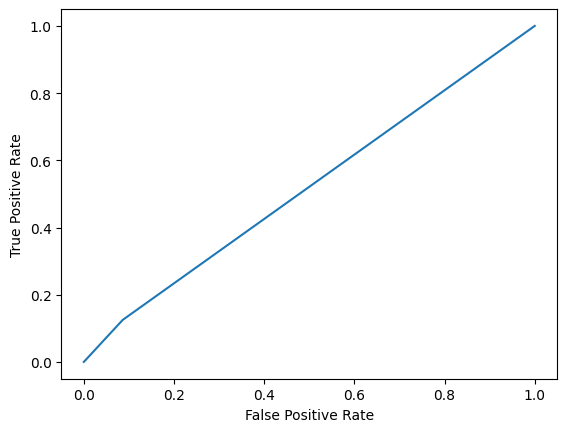

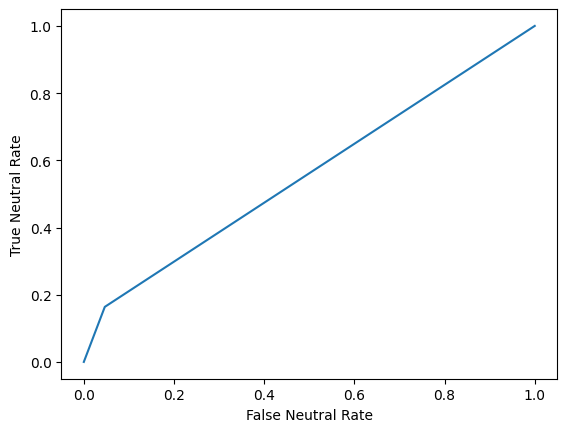

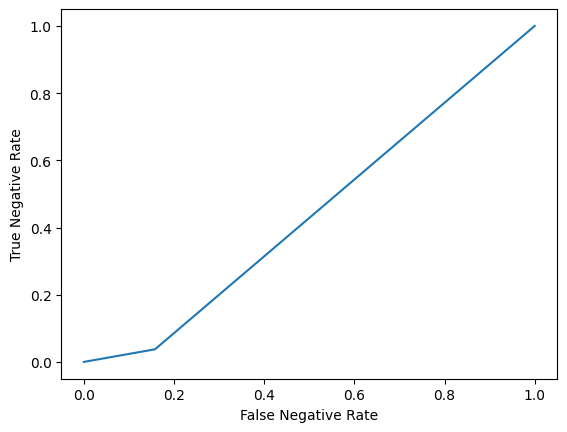

In [ ]:
create_roc_curve(y_pred_pl, y_test_pl)

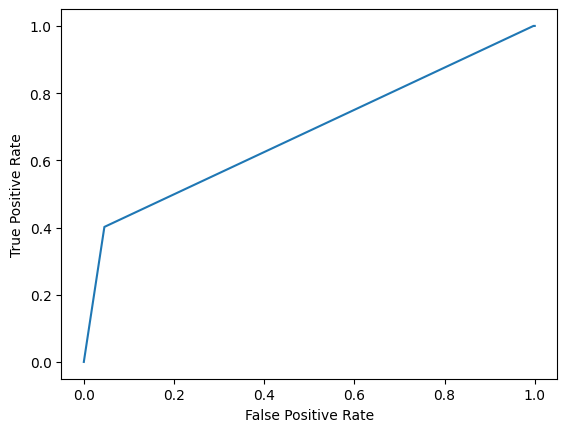

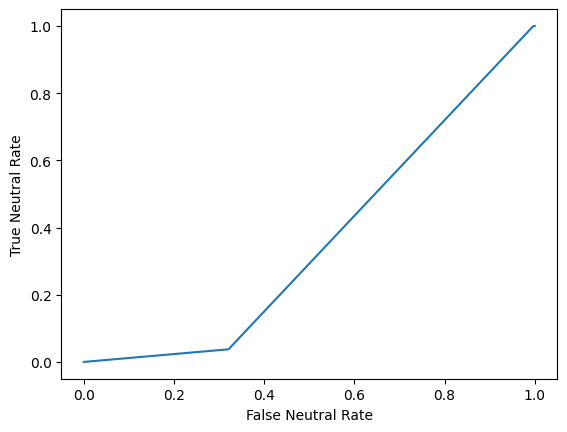

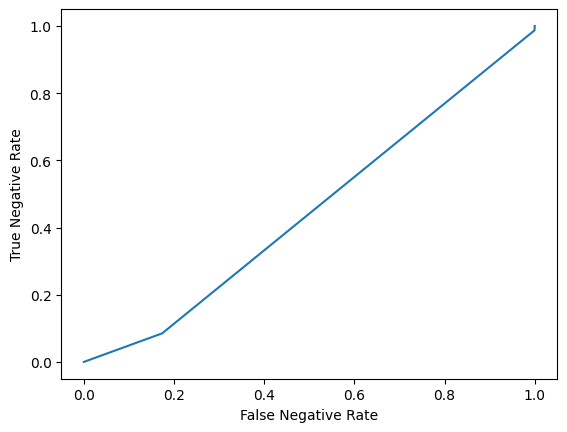

In [ ]:
create_roc_curve(y_pred_en, y_test_en)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_pl = SVC()
model_pl.fit(X_train_pl, y_train_pl)

SVC()

In [ ]:
model_en = SVC()
model_en.fit(X_train_en, y_train_en)

SVC()

In [ ]:
y_pred_pl = model_pl.predict(X_test_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1029,   89,    1],
       [ 427,  273,    2],
       [  73,   44,   11]])

In [ ]:
y_pred_en = model_en.predict(X_test_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 126,  151,   29],
       [  34, 1343,  115],
       [  14,  271,  606]])

In [ ]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.67      0.92      0.78      1119
           0       0.67      0.39      0.49       702
           1       0.79      0.09      0.15       128

    accuracy                           0.67      1949
   macro avg       0.71      0.46      0.47      1949
weighted avg       0.68      0.67      0.63      1949



In [ ]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.72      0.41      0.53       306
           0       0.76      0.90      0.82      1492
           1       0.81      0.68      0.74       891

    accuracy                           0.77      2689
   macro avg       0.76      0.66      0.70      2689
weighted avg       0.77      0.77      0.76      2689



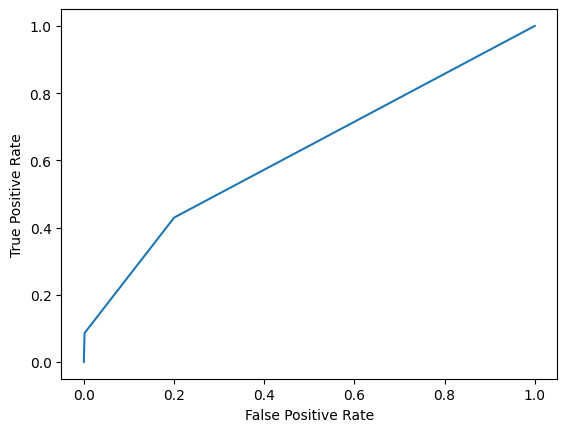

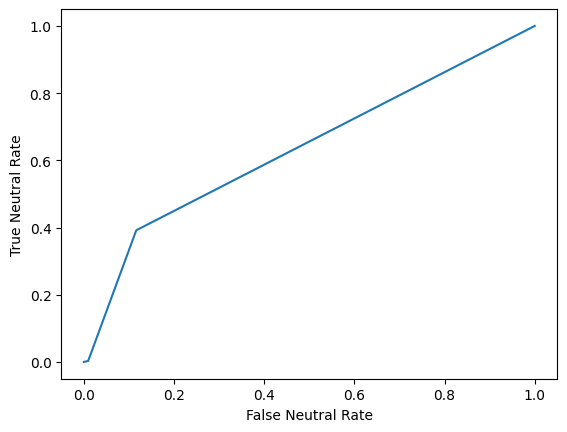

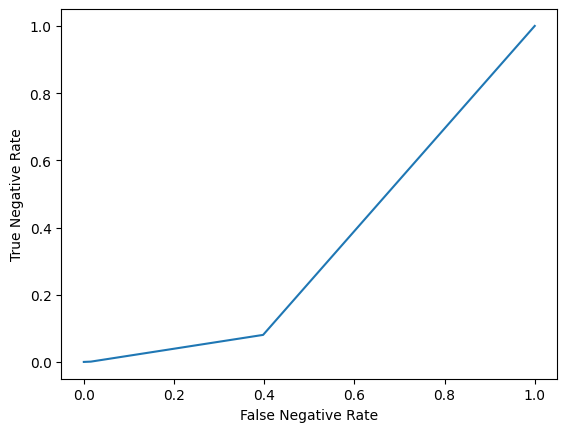

In [ ]:
create_roc_curve(y_pred_pl, y_test_pl)

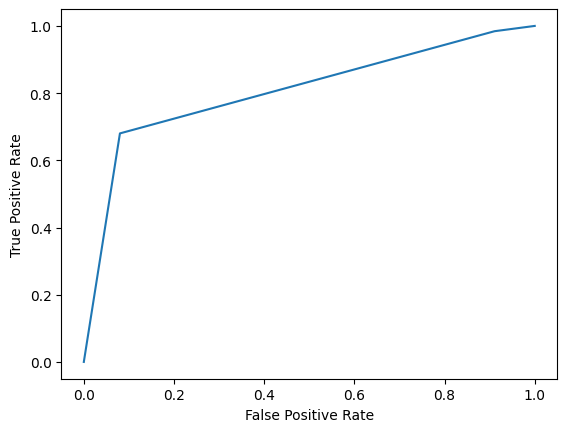

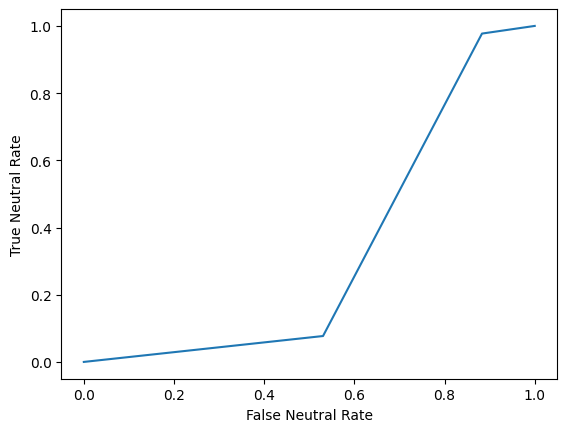

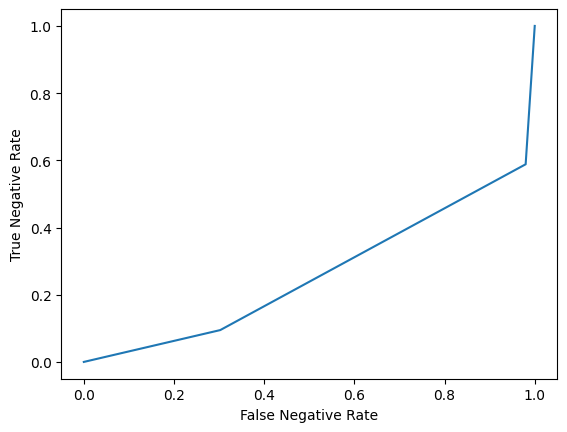

In [ ]:
create_roc_curve(y_pred_en, y_test_en)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_pl = LogisticRegression(solver='liblinear', random_state=0)
model_pl.fit(X_train_pl, y_train_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1029,   89,    1],
       [ 427,  273,    2],
       [  73,   44,   11]])

In [ ]:
model_en = LogisticRegression(solver='liblinear', random_state=0)
model_en.fit(X_train_en, y_train_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 126,  151,   29],
       [  34, 1343,  115],
       [  14,  271,  606]])

In [ ]:
y_pred_pl = model_pl.predict(X_test_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1034,   84,    1],
       [ 422,  279,    1],
       [  70,   51,    7]])

In [ ]:
y_pred_en = model_en.predict(X_test_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 108,  157,   41],
       [  40, 1337,  115],
       [  14,  280,  597]])

In [ ]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.68      0.92      0.78      1119
           0       0.67      0.40      0.50       702
           1       0.78      0.05      0.10       128

    accuracy                           0.68      1949
   macro avg       0.71      0.46      0.46      1949
weighted avg       0.68      0.68      0.64      1949



In [ ]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.67      0.35      0.46       306
           0       0.75      0.90      0.82      1492
           1       0.79      0.67      0.73       891

    accuracy                           0.76      2689
   macro avg       0.74      0.64      0.67      2689
weighted avg       0.76      0.76      0.75      2689



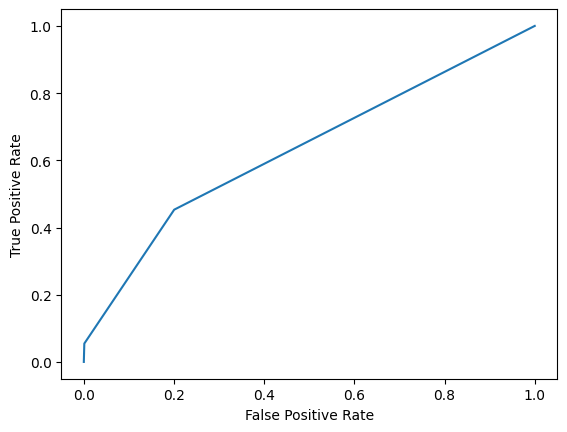

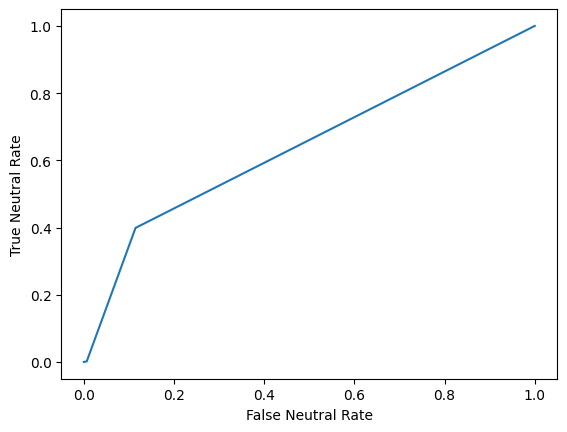

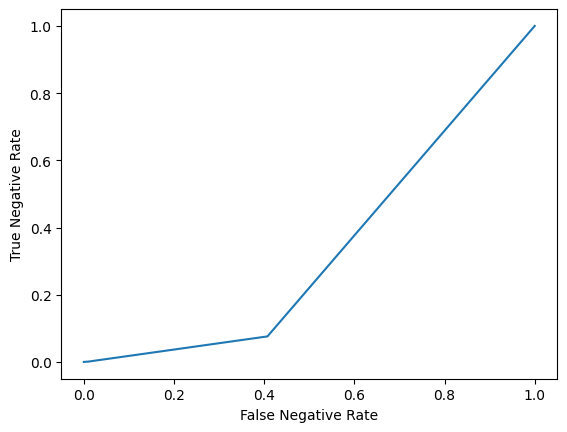

In [ ]:
create_roc_curve(y_pred_pl, y_test_pl)

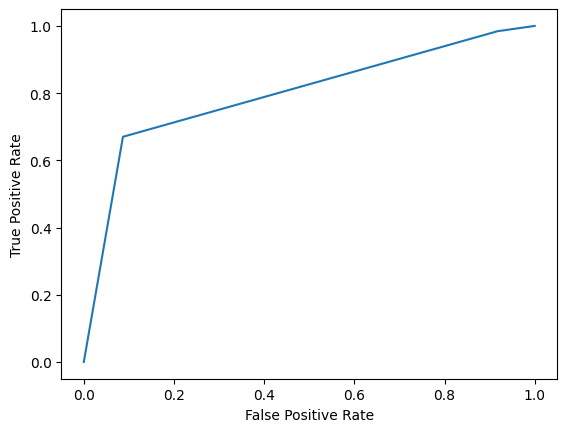

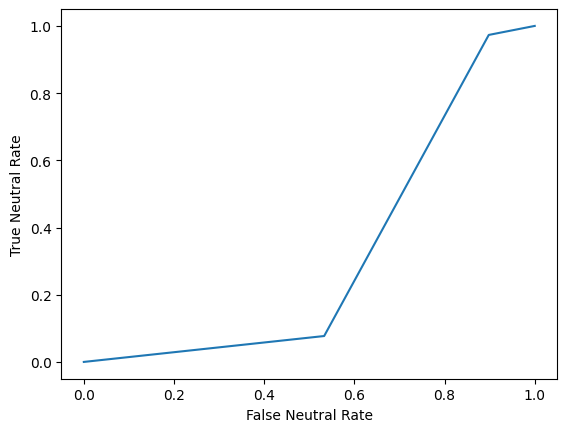

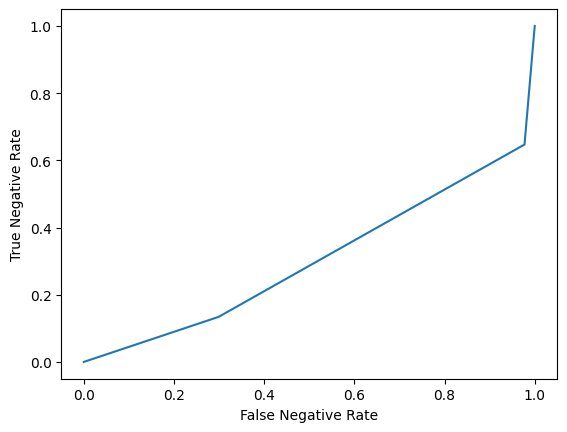

In [ ]:
create_roc_curve(y_pred_en, y_test_en)

#BERT


In [ ]:
!pip install transformers==4.26.1
!pip install -U datasets
!pip install plot_keras_history -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 102.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 224.5/224.5 kB 29.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 114.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 474.6/474.6 kB 30.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split
import transformers
from transformers import AutoTokenizer, BertModel, BertTokenizerFast
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, RobertaForSequenceClassification
import pandas as pd
from datasets import Dataset
from datasets import load_metric
import numpy as np
import torch
from tensorflow.keras.callbacks import EarlyStopping
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
from datasets import Dataset

In [ ]:
file_cleaned_pl = data_pl.drop(labels=['sentiment'], axis=1).reset_index(drop=True).rename(columns={'tweet':'text', 'target':'labels'})
file_cleaned_pl.labels.replace([1, 0, -1], [2, 1, 0], inplace=True)
file_cleaned_pl

text  labels
0      od czas wpuszczec ukrainski zboze polski rynek...       1
1      za nikt tyle odebrac ukradnie pis wolec miec o...       0
2      minister podpisac dokument przyspieszyc transf...       1
3      pozytywny przekaz majstrowac komisarza pis wie...       1
4      platforma media atakowac klamstwo manipulacj d...       1
...                                                  ...     ...
19485  mow siebie za dlugo obserwowac scena polityczn...       0
19486  dla kto eldorado emeryt rzadzacy dzieki progra...       1
19487  przestan dziewcze belkotac ! bzdura gaworzyc !...       0
19488          czyli wolec pan pis likwidacja panstwo ?        0
19489  haha swirek ? ten jacht kilkanascie milion mag...       0

[19490 rows x 2 columns]

In [ ]:
file_cleaned_en = data_en.drop(labels=['sentiment'], axis=1).reset_index(drop=True).rename(columns={'tweet':'text', 'target':'labels'})
file_cleaned_en.labels.replace([1, 0, -1], [2, 1, 0], inplace=True)
file_cleaned_en

text  labels
0      united by music slogan year s esc we re look f...       2
1      junior eurovision 2023 hold nice november 26 !...       2
2      slovenia 5/10 same song like year europe vote ...       1
3      dear be wrong with you ? ? ? do not diligence ...       0
4      poland 7/10 still disqualification ? so sick h...       1
...                                                  ...     ...
26879  you right slander germany year idc what be opi...       1
26880  so addition know 7 boy / male band eurovision2...       2
26881                     be bang win eurovision 2023 ?        1
26882              this drill growl return eurovision !        1
26883  now look likely semifinal qualifier finish gra...       0

[26884 rows x 2 columns]

In [ ]:
dataset_pl = Dataset.from_pandas(file_cleaned_pl)
dataset_pl = dataset_pl.train_test_split(0.1)

In [ ]:
dataset_en = Dataset.from_pandas(file_cleaned_en)
dataset_en = dataset_en.train_test_split(0.1)

In [ ]:
print(dataset_en)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 24195
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 2689
    })
})


In [ ]:
model_checkpoint_distilbert = 'distilbert-base-uncased'
batch_size = 64

In [ ]:
model_checkpoint_roberta = 'roberta-base'
batch_size = 64

In [ ]:
tokenizer_roberta = AutoTokenizer.from_pretrained(model_checkpoint_roberta, use_fast=True)
tokenizer_distilbert = AutoTokenizer.from_pretrained(model_checkpoint_distilbert, use_fast=True)

In [ ]:
def process_roberta(x):
  return tokenizer_roberta(x['text'])

def process_distilbert(x):
  return tokenizer_distilbert(x['text'])

train_ds_roberta_pl = dataset_pl['train'].map(process_roberta)
test_ds_roberta_pl = dataset_pl['test'].map(process_roberta)

train_ds_distilbert_pl = dataset_pl['train'].map(process_distilbert)
test_ds_distilbert_pl = dataset_pl['test'].map(process_distilbert)

Map:   0%|          | 0/17541 [00:00<?, ? examples/s]

Map:   0%|          | 0/1949 [00:00<?, ? examples/s]

Map:   0%|          | 0/17541 [00:00<?, ? examples/s]

Map:   0%|          | 0/1949 [00:00<?, ? examples/s]

In [ ]:
train_ds_roberta_en = dataset_en['train'].map(process_roberta)
test_ds_roberta_en = dataset_en['test'].map(process_roberta)

train_ds_distilbert_en = dataset_en['train'].map(process_distilbert)
test_ds_distilbert_en = dataset_en['test'].map(process_distilbert)

Map:   0%|          | 0/24195 [00:00<?, ? examples/s]

Map:   0%|          | 0/2689 [00:00<?, ? examples/s]

Map:   0%|          | 0/24195 [00:00<?, ? examples/s]

Map:   0%|          | 0/2689 [00:00<?, ? examples/s]

In [ ]:
num_labels = 3
model_distilbert = AutoModelForSequenceClassification.from_pretrained(model_checkpoint_distilbert, num_labels=num_labels)
model_roberta = RobertaForSequenceClassification.from_pretrained(model_checkpoint_roberta, num_labels=num_labels)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
args_distilbert = TrainingArguments(
    f'{model_checkpoint_distilbert}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.02,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
    
)

args_roberta = TrainingArguments(
    f'{model_checkpoint_roberta}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.02,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
    
)

In [ ]:
metric = load_metric('glue', 'sst2')

def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

<ipython-input-41-a6bf47ba013e>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', 'sst2')


In [ ]:
train_ds_distilbert_en

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 24195
})

In [ ]:
dataset_pl = dataset_pl.with_format("torch")
dataset_en = dataset_en.with_format("torch")

In [ ]:
es = EarlyStopping(monitor='Accuracy', mode='max', patience=5, restore_best_weights=True)

In [ ]:
trainer_distilbert_pl = Trainer(
    model_distilbert,
    args_distilbert,
    train_dataset=train_ds_distilbert_pl,
    eval_dataset=test_ds_distilbert_pl,
    tokenizer=tokenizer_distilbert,
    compute_metrics=compute_metrics,
)

trainer_distilbert_en = Trainer(
    model_distilbert,
    args_distilbert,
    train_dataset=train_ds_distilbert_en,
    eval_dataset=test_ds_distilbert_en,
    tokenizer=tokenizer_distilbert,
    compute_metrics=compute_metrics,
)

trainer_roberta_pl = Trainer(
    model_roberta,
    args_roberta,
    train_dataset=train_ds_roberta_pl,
    eval_dataset=test_ds_roberta_pl,
    tokenizer=tokenizer_roberta,
    compute_metrics=compute_metrics,
)

trainer_roberta_en = Trainer(
    model_roberta,
    args_roberta,
    train_dataset=train_ds_roberta_en,
    eval_dataset=test_ds_roberta_en,
    tokenizer=tokenizer_roberta,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_roberta_pl.evaluate([train_ds_roberta_pl[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'eval_loss': 1.0653018951416016,
 'eval_accuracy': 1.0,
 'eval_runtime': 2.7643,
 'eval_samples_per_second': 0.362,
 'eval_steps_per_second': 0.362}

In [ ]:
trainer_roberta_en.evaluate([train_ds_roberta_en[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.


{'eval_loss': 1.1619162559509277,
 'eval_accuracy': 0.0,
 'eval_runtime': 0.0393,
 'eval_samples_per_second': 25.462,
 'eval_steps_per_second': 25.462}

In [ ]:
trainer_distilbert_pl.evaluate([train_ds_distilbert_pl[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'eval_loss': 1.0629364252090454,
 'eval_accuracy': 0.0,
 'eval_runtime': 0.0437,
 'eval_samples_per_second': 22.907,
 'eval_steps_per_second': 22.907}

In [ ]:
trainer_distilbert_en.evaluate([train_ds_distilbert_en[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.


{'eval_loss': 1.0728580951690674,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.038,
 'eval_samples_per_second': 26.287,
 'eval_steps_per_second': 26.287}

In [ ]:
trainer_roberta_pl.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 17541
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1375
  Number of trainable parameters = 124647939


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1949
  Batch size = 64


Saving model checkpoint to roberta-base_sentiment_analysis/checkpoint-275
Configuration saved in roberta-base_sentiment_analysis/checkpoint-275/config.json
Model weights saved in roberta-base_sentiment_analysis/checkpoint-275/pytorch_model.bin
tokenizer config file saved in roberta-base_sentiment_analysis/checkpoint-275/tokenizer_config.json
Special tokens file saved in roberta-base_sentiment_analysis/checkpoint-275/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1949
  Batch size = 64
Saving model checkpoint to roberta-base_sentiment_analysis/checkpoint-550
Configuration saved in roberta-base_sentiment_analysis/checkpoint-550/config.json
Model weights saved in roberta-base_sentiment_analysis/checkpoint

TrainOutput(global_step=1375, training_loss=0.711301435990767, metrics={'train_runtime': 1480.6912, 'train_samples_per_second': 59.232, 'train_steps_per_second': 0.929, 'total_flos': 4711649055264396.0, 'train_loss': 0.711301435990767, 'epoch': 5.0})

In [ ]:
trainer_roberta_en.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 24195
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1895
  Number of trainable parameters = 124647939


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2689
  Batch size = 64


Saving model checkpoint to roberta-base_sentiment_analysis/checkpoint-379
Configuration saved in roberta-base_sentiment_analysis/checkpoint-379/config.json
Model weights saved in roberta-base_sentiment_analysis/checkpoint-379/pytorch_model.bin
tokenizer config file saved in roberta-base_sentiment_analysis/checkpoint-379/tokenizer_config.json
Special tokens file saved in roberta-base_sentiment_analysis/checkpoint-379/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2689
  Batch size = 64
Saving model checkpoint to roberta-base_sentiment_analysis/checkpoint-758
Configuration saved in roberta-base_sentiment_analysis/checkpoint-758/config.json
Model weights saved in roberta-base_sentiment_analysis/checkpoint

TrainOutput(global_step=1895, training_loss=0.26667400953952114, metrics={'train_runtime': 1198.6784, 'train_samples_per_second': 100.924, 'train_steps_per_second': 1.581, 'total_flos': 3654545676923484.0, 'train_loss': 0.26667400953952114, 'epoch': 5.0})

In [ ]:
trainer_distilbert_pl.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 17541
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1375
  Number of trainable parameters = 66955779


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1949
  Batch size = 64


Saving model checkpoint to distilbert-base-uncased_sentiment_analysis/checkpoint-275
Configuration saved in distilbert-base-uncased_sentiment_analysis/checkpoint-275/config.json
Model weights saved in distilbert-base-uncased_sentiment_analysis/checkpoint-275/pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased_sentiment_analysis/checkpoint-275/tokenizer_config.json
Special tokens file saved in distilbert-base-uncased_sentiment_analysis/checkpoint-275/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1949
  Batch size = 64
Saving model checkpoint to distilbert-base-uncased_sentiment_analysis/checkpoint-550
Configuration saved in distilbert-base-uncased_sentiment_analysis/checkpoin

TrainOutput(global_step=1375, training_loss=0.6572872314453125, metrics={'train_runtime': 724.0516, 'train_samples_per_second': 121.131, 'train_steps_per_second': 1.899, 'total_flos': 2255385132174276.0, 'train_loss': 0.6572872314453125, 'epoch': 5.0})

In [ ]:
trainer_distilbert_en.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 24195
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1895
  Number of trainable parameters = 66955779


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2689
  Batch size = 64


Saving model checkpoint to distilbert-base-uncased_sentiment_analysis/checkpoint-379
Configuration saved in distilbert-base-uncased_sentiment_analysis/checkpoint-379/config.json
Model weights saved in distilbert-base-uncased_sentiment_analysis/checkpoint-379/pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased_sentiment_analysis/checkpoint-379/tokenizer_config.json
Special tokens file saved in distilbert-base-uncased_sentiment_analysis/checkpoint-379/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2689
  Batch size = 64
Saving model checkpoint to distilbert-base-uncased_sentiment_analysis/checkpoint-758
Configuration saved in distilbert-base-uncased_sentiment_analysis/checkpoin

TrainOutput(global_step=1895, training_loss=0.2653818658914289, metrics={'train_runtime': 565.4519, 'train_samples_per_second': 213.944, 'train_steps_per_second': 3.351, 'total_flos': 1693204940978586.0, 'train_loss': 0.2653818658914289, 'epoch': 5.0})

In [ ]:
trainer_roberta_pl.save_model('trainer_roberta_pl.model')
trainer_roberta_en.save_model('trainer_roberta_en.model')
trainer_distilbert_pl.save_model('trainer_distilbert_pl.model')
trainer_distilbert_en.save_model('trainer_distilbert_en.model')

In [ ]:
trainer_roberta_pl.model
trainer_roberta_en.model
trainer_distilbert_pl.model
trainer_distilbert_en.model

In [ ]:
text_to_test = "PIS"  

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = tokenizer(text_to_test, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

with torch.no_grad():
  output = model_roberta(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

predictions.item()
print('Roberta:')
if predictions.item() == 0:
  print('This text is negative')
elif predictions.item() == 1 :
  print('This text is neutral')
else :
  print('This text is positive')

with torch.no_grad():
  output = model_distilbert(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

predictions.item()

print('Distilbert')
if predictions.item() == 0:
  print('This text is negative')
elif predictions.item() == 1 :
  print('This text is neutral')
else :
  print('This text is positive')

#LSTM - Jƒôzyk Polski



In [ ]:
data_pl

tweet sentiment  target
0      od czas wpuszczec ukrainski zboze polski rynek...   neutral       0
1      za nikt tyle odebrac ukradnie pis wolec miec o...  negative      -1
2      minister podpisac dokument przyspieszyc transf...   neutral       0
3      pozytywny przekaz majstrowac komisarza pis wie...   neutral       0
4      platforma media atakowac klamstwo manipulacj d...   neutral       0
...                                                  ...       ...     ...
19485  mow siebie za dlugo obserwowac scena polityczn...  negative      -1
19486  dla kto eldorado emeryt rzadzacy dzieki progra...   neutral       0
19487  przestan dziewcze belkotac ! bzdura gaworzyc !...  negative      -1
19488          czyli wolec pan pis likwidacja panstwo ?   negative      -1
19489  haha swirek ? ten jacht kilkanascie milion mag...  negative      -1

[19490 rows x 3 columns]

In [ ]:
max_words = 5000
max_len = 200

tokenizer_lstm_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_lstm_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_lstm_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_lstm_pl = Sequential()
model_lstm_pl.add(layers.Embedding(max_words, 20))
model_lstm_pl.add(layers.LSTM(15, dropout=0.5))
model_lstm_pl.add(layers.Dense(3, activation='softmax'))

model_lstm_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_lstm_pl = model_lstm_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 25s 30ms/step - loss: 0.8481 - accuracy: 0.5948 - val_loss: 0.7137 - val_accuracy: 0.6865
Epoch 2/10
757/757 [==============================] - 14s 19ms/step - loss: 0.6602 - accuracy: 0.7230 - val_loss: 0.6213 - val_accuracy: 0.7412
Epoch 3/10
757/757 [==============================] - 18s 23ms/step - loss: 0.5944 - accuracy: 0.7553 - val_loss: 0.6259 - val_accuracy: 0.7482
Epoch 4/10
757/757 [==============================] - 13s 17ms/step - loss: 0.5581 - accuracy: 0.7739 - val_loss: 0.5928 - val_accuracy: 0.7542
Epoch 5/10
757/757 [==============================] - 15s 20ms/step - loss: 0.5363 - accuracy: 0.7838 - val_loss: 0.5922 - val_accuracy: 0.7534
Epoch 6/10
757/757 [==============================] - 14s 18ms/step - loss: 0.5119 - accuracy: 0.7934 - val_loss: 0.5621 - val_accuracy: 0.7683
Epoch 7/10
757/757 [==============================] - 16s 21ms/step - loss: 0.5023 - accuracy: 0.7980 - val_loss: 0.5665 - val_accuracy:

LSTM



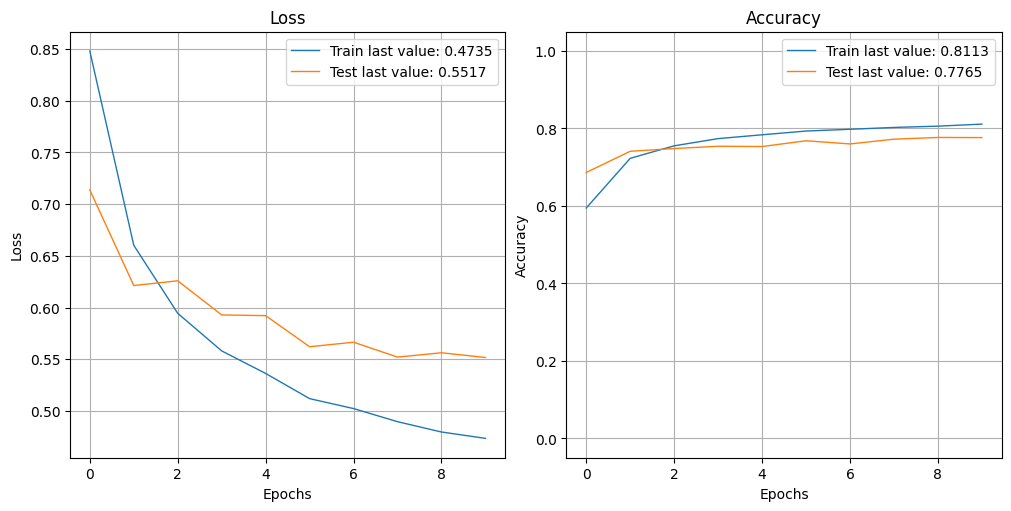

In [ ]:
print(r'LSTM')
print()
show_history(history_lstm_pl)
plot_history(history_lstm_pl)
plt.close()

# LSTM - Jƒôzyk Angielski


In [ ]:
max_words = 5000
max_len = 200

tokenizer_lstm_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_lstm_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_lstm_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_lstm_en = Sequential()
model_lstm_en.add(layers.Embedding(max_words, 20))
model_lstm_en.add(layers.LSTM(15, dropout=0.5))
model_lstm_en.add(layers.Dense(3, activation='softmax'))

model_lstm_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_lstm_en = model_lstm_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 27s 32ms/step - loss: 0.8369 - accuracy: 0.6171 - val_loss: 0.7448 - val_accuracy: 0.6750
Epoch 2/10
757/757 [==============================] - 8s 11ms/step - loss: 0.6782 - accuracy: 0.7165 - val_loss: 0.6429 - val_accuracy: 0.7255
Epoch 3/10
757/757 [==============================] - 12s 16ms/step - loss: 0.6024 - accuracy: 0.7561 - val_loss: 0.6001 - val_accuracy: 0.7482
Epoch 4/10
757/757 [==============================] - 8s 10ms/step - loss: 0.5607 - accuracy: 0.7708 - val_loss: 0.5765 - val_accuracy: 0.7639
Epoch 5/10
757/757 [==============================] - 8s 10ms/step - loss: 0.5404 - accuracy: 0.7790 - val_loss: 0.5630 - val_accuracy: 0.7687
Epoch 6/10
757/757 [==============================] - 8s 11ms/step - loss: 0.5210 - accuracy: 0.7905 - val_loss: 0.5591 - val_accuracy: 0.7661
Epoch 7/10
757/757 [==============================] - 7s 10ms/step - loss: 0.5046 - accuracy: 0.7953 - val_loss: 0.5547 - val_accuracy: 0.76

LSTM



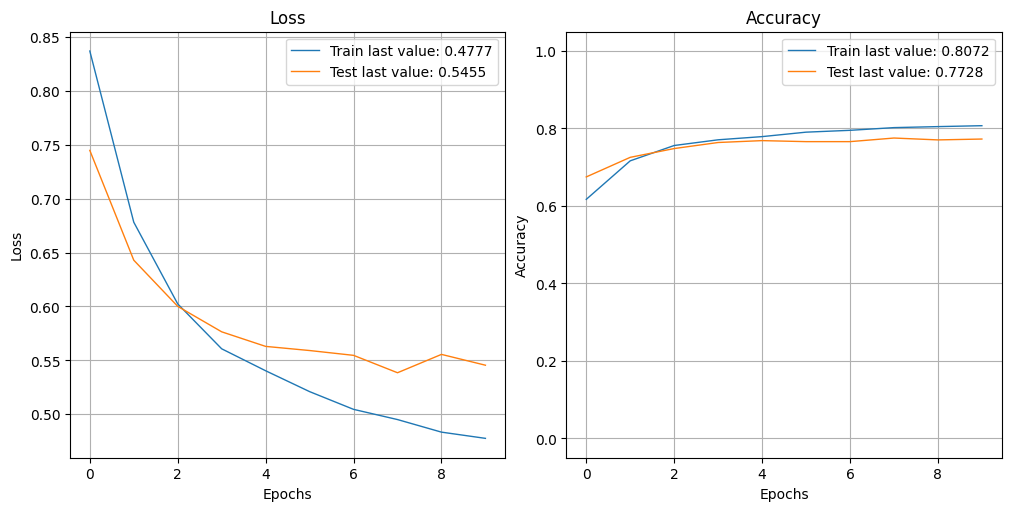

In [ ]:
print(r'LSTM')
print()
show_history(history_lstm_en)
plot_history(history_lstm_en)
plt.close()

#BLSTM - Jƒôzyk Polski


In [ ]:
max_words = 5000
max_len = 200

tokenizer_blstm_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_blstm_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_blstm_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_blstm_pl = Sequential()

model_blstm_pl.add(layers.Embedding(max_words, 40))
model_blstm_pl.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model_blstm_pl.add(layers.Dense(3, activation='softmax'))

model_blstm_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_blstm_pl = model_blstm_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 53s 78ms/step - loss: 0.8236 - accuracy: 0.5911 - val_loss: 0.7528 - val_accuracy: 0.6660
Epoch 2/10
549/549 [==============================] - 22s 39ms/step - loss: 0.7312 - accuracy: 0.6628 - val_loss: 0.7047 - val_accuracy: 0.6911
Epoch 3/10
549/549 [==============================] - 19s 35ms/step - loss: 0.6856 - accuracy: 0.6874 - val_loss: 0.6927 - val_accuracy: 0.6809
Epoch 4/10
549/549 [==============================] - 22s 41ms/step - loss: 0.6570 - accuracy: 0.7054 - val_loss: 0.6848 - val_accuracy: 0.6814
Epoch 5/10
549/549 [==============================] - 19s 34ms/step - loss: 0.6379 - accuracy: 0.7177 - val_loss: 0.7220 - val_accuracy: 0.6609
Epoch 6/10
549/549 [==============================] - 13s 24ms/step - loss: 0.6213 - accuracy: 0.7246 - val_loss: 0.6974 - val_accuracy: 0.6911
Epoch 7/10
549/549 [==============================] - 16s 30ms/step - loss: 0.6079 - accuracy: 0.7368 - val_loss: 0.6929 - val_accuracy:

BLSTM



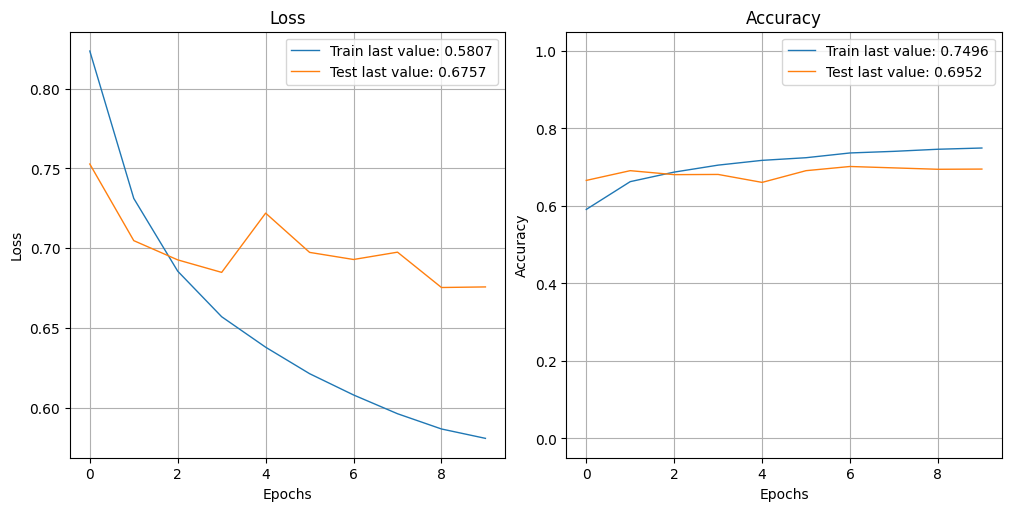

In [ ]:
print(r'BLSTM')
print()
show_history(history_blstm_pl)
plot_history(history_blstm_pl)
plt.close()

#BLSTM - Jƒôzyk Angielski

In [ ]:
max_words = 5000
max_len = 200

tokenizer_blstm_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_blstm_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_blstm_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_blstm_en = Sequential()

model_blstm_en.add(layers.Embedding(max_words, 40))
model_blstm_en.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model_blstm_en.add(layers.Dense(3, activation='softmax'))

model_blstm_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_blstm_en = model_blstm_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 33s 38ms/step - loss: 0.8194 - accuracy: 0.6267 - val_loss: 0.7264 - val_accuracy: 0.6854
Epoch 2/10
757/757 [==============================] - 15s 20ms/step - loss: 0.6467 - accuracy: 0.7310 - val_loss: 0.6280 - val_accuracy: 0.7334
Epoch 3/10
757/757 [==============================] - 13s 18ms/step - loss: 0.5889 - accuracy: 0.7580 - val_loss: 0.6098 - val_accuracy: 0.7475
Epoch 4/10
757/757 [==============================] - 13s 17ms/step - loss: 0.5530 - accuracy: 0.7757 - val_loss: 0.5697 - val_accuracy: 0.7657
Epoch 5/10
757/757 [==============================] - 14s 18ms/step - loss: 0.5260 - accuracy: 0.7866 - val_loss: 0.5753 - val_accuracy: 0.7635
Epoch 6/10
757/757 [==============================] - 14s 18ms/step - loss: 0.5091 - accuracy: 0.7951 - val_loss: 0.5712 - val_accuracy: 0.7575
Epoch 7/10
757/757 [==============================] - 13s 17ms/step - loss: 0.4947 - accuracy: 0.8002 - val_loss: 0.5651 - val_accuracy:

BLSTM



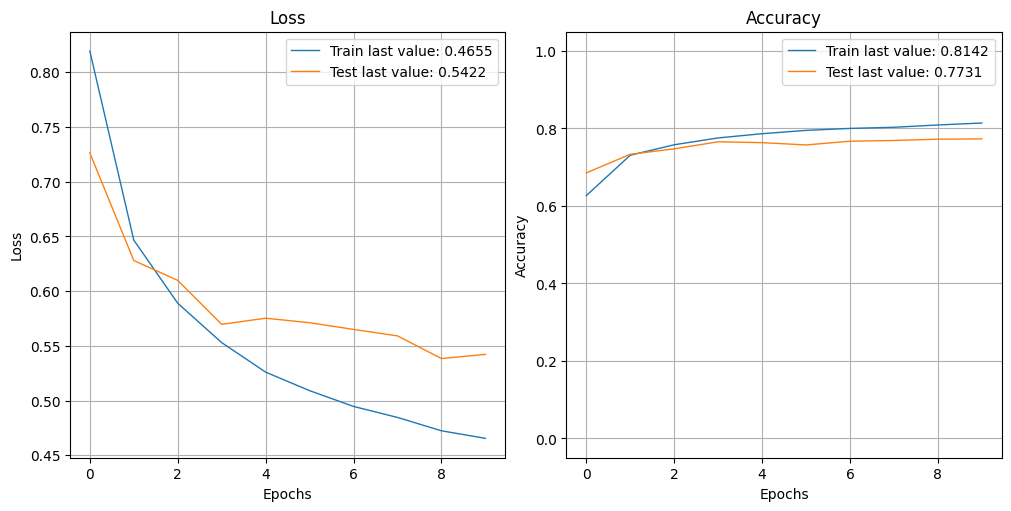

In [ ]:
print(r'BLSTM')
print()
show_history(history_blstm_en)
plot_history(history_blstm_en)
plt.close()

#Sieƒá Splotowa (CNN) - Jƒôzyk Polski

In [ ]:
max_words = 5000
max_len = 200

tokenizer_cnn_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_cnn_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_cnn_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_cnn_pl = Sequential()

model_cnn_pl.add(layers.Embedding(max_words, 40, input_length=max_len))
model_cnn_pl.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_pl.add(layers.MaxPooling1D(5))
model_cnn_pl.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_pl.add(layers.GlobalMaxPooling1D())
model_cnn_pl.add(layers.Dense(3, activation='softmax'))

model_cnn_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_cnn_pl = model_cnn_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 28s 36ms/step - loss: 0.8289 - accuracy: 0.5869 - val_loss: 0.7592 - val_accuracy: 0.6588
Epoch 2/10
549/549 [==============================] - 5s 8ms/step - loss: 0.7039 - accuracy: 0.6830 - val_loss: 0.7091 - val_accuracy: 0.6870
Epoch 3/10
549/549 [==============================] - 6s 10ms/step - loss: 0.6293 - accuracy: 0.7293 - val_loss: 0.6974 - val_accuracy: 0.6901
Epoch 4/10
549/549 [==============================] - 4s 7ms/step - loss: 0.5603 - accuracy: 0.7653 - val_loss: 0.7169 - val_accuracy: 0.6665
Epoch 5/10
549/549 [==============================] - 3s 6ms/step - loss: 0.4776 - accuracy: 0.8018 - val_loss: 0.7408 - val_accuracy: 0.6824
Epoch 6/10
549/549 [==============================] - 4s 7ms/step - loss: 0.3926 - accuracy: 0.8440 - val_loss: 0.7880 - val_accuracy: 0.6896
Epoch 7/10
549/549 [==============================] - 4s 7ms/step - loss: 0.3168 - accuracy: 0.8790 - val_loss: 0.8332 - val_accuracy: 0.6650
Epo

Sieƒá spolotwa



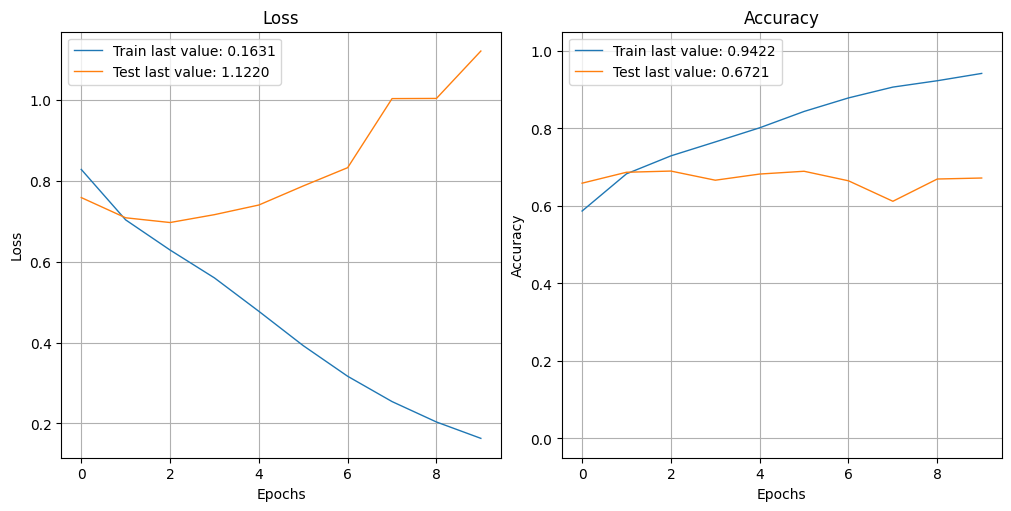

In [ ]:
print(r'Sieƒá spolotwa')
print()
show_history(history_cnn_pl)
plot_history(history_cnn_pl)
plt.close()

#Sieƒá Splotowa (CNN) - Jƒôzyk Angielski

In [ ]:
max_words = 5000
max_len = 200

tokenizer_cnn_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_cnn_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_cnn_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [ ]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [ ]:
model_cnn_en = Sequential()

model_cnn_en.add(layers.Embedding(max_words, 40, input_length=max_len))
model_cnn_en.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_en.add(layers.MaxPooling1D(5))
model_cnn_en.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_en.add(layers.GlobalMaxPooling1D())
model_cnn_en.add(layers.Dense(3, activation='softmax'))

model_cnn_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_cnn_en = model_cnn_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 20s 24ms/step - loss: 0.8201 - accuracy: 0.6317 - val_loss: 0.6795 - val_accuracy: 0.7259
Epoch 2/10
757/757 [==============================] - 5s 7ms/step - loss: 0.5797 - accuracy: 0.7633 - val_loss: 0.5773 - val_accuracy: 0.7531
Epoch 3/10
757/757 [==============================] - 6s 8ms/step - loss: 0.4839 - accuracy: 0.8062 - val_loss: 0.5491 - val_accuracy: 0.7631
Epoch 4/10
757/757 [==============================] - 5s 6ms/step - loss: 0.4242 - accuracy: 0.8322 - val_loss: 0.5501 - val_accuracy: 0.7720
Epoch 5/10
757/757 [==============================] - 4s 6ms/step - loss: 0.3711 - accuracy: 0.8568 - val_loss: 0.5380 - val_accuracy: 0.7743
Epoch 6/10
757/757 [==============================] - 6s 7ms/step - loss: 0.3226 - accuracy: 0.8780 - val_loss: 0.5657 - val_accuracy: 0.7750
Epoch 7/10
757/757 [==============================] - 4s 5ms/step - loss: 0.2727 - accuracy: 0.8992 - val_loss: 0.6447 - val_accuracy: 0.7709
Epoc

Sieƒá spolotwa



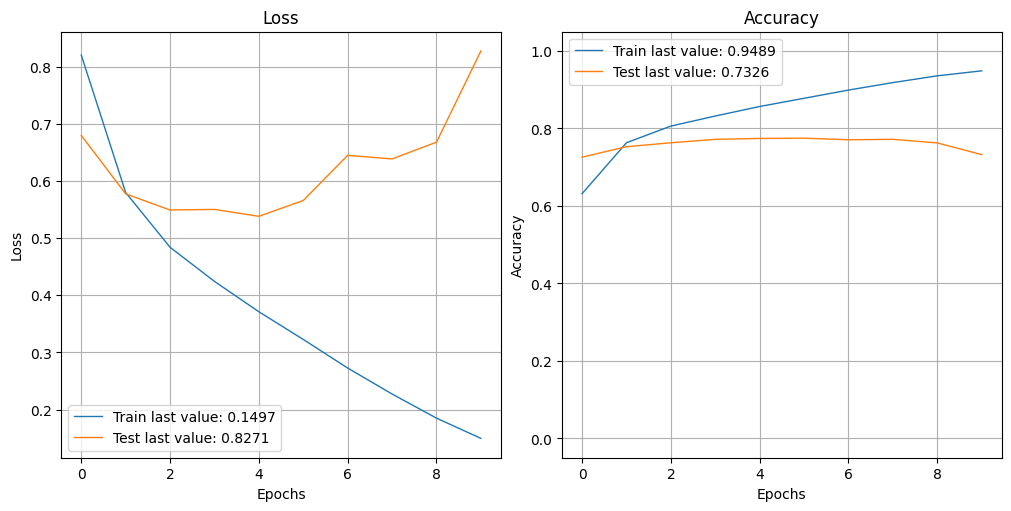

In [ ]:
print(r'Sieƒá spolotwa')
print()
show_history(history_cnn_en)
plot_history(history_cnn_en)
plt.close()

#Test LSTM, BLSTM, CNN - Jƒôzyk Polski


In [ ]:
predict(model_lstm_pl, ['Polska jest krajem w Europie'], tokenizer_lstm_pl)

1/1 - 1s - 942ms/epoch - 942ms/step
[0.787398   0.20223522 0.01036687]
['Polska jest krajem w Europie']
Predicted sentiment :  Negative


In [ ]:
predict(model_blstm_pl, ['Polska jest krajem w Europie'], tokenizer_blstm_pl)

1/1 - 1s - 1s/epoch - 1s/step
[0.4692752  0.32304034 0.2076844 ]
['Polska jest krajem w Europie']
Predicted sentiment :  Negative


In [ ]:
predict(model_cnn_pl, ['Polska jest krajem w Europie'], tokenizer_cnn_pl)

1/1 - 0s - 119ms/epoch - 119ms/step
[0.1726086  0.7779633  0.04942803]
['Polska jest krajem w Europie']
Predicted sentiment :  Neutral


#Test LSTM, BLSTM, CNN - Jƒôzyk Angielski

In [ ]:
predict(model_lstm_en, ['Poland is a country in Europe'], tokenizer_lstm_en)

1/1 - 0s - 21ms/epoch - 21ms/step
[0.94554377 0.04482278 0.00963346]
['Poland is a country in Europe']
Predicted sentiment :  Negative


In [ ]:
predict(model_blstm_en, ['Poland is a country in Europe'], tokenizer_blstm_en)

1/1 - 1s - 937ms/epoch - 937ms/step
[0.9474261  0.04326627 0.00930769]
['Poland is a country in Europe']
Predicted sentiment :  Negative


In [ ]:
predict(model_cnn_en, ['Poland is a country in Europe'], tokenizer_cnn_en)

1/1 - 0s - 111ms/epoch - 111ms/step
[0.7216613  0.25354633 0.02479238]
['Poland is a country in Europe']
Predicted sentiment :  Negative
